In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
antibody_to_gene = pd.read_csv('data/CCLE_RPPA_Ab_info_20181226.csv', index_col=0)
antibody_to_gene

In [3]:
# remove not validated
antibody_to_gene = antibody_to_gene.loc[
    antibody_to_gene.Validation_Status == 'Validated'].copy()
antibody_to_gene

,Target_Genes,Validation_Status,Company,Catalog_Number
Antibody_Name,,,,
14-3-3_beta,YWHAB,Validated,Santa Cruz,sc-628
14-3-3_zeta,YWHAZ,Validated,Santa Cruz,sc-1019
4E-BP1,EIF4EBP1,Validated,CST,9452
4E-BP1_pS65,EIF4EBP1,Validated,CST,9456
4E-BP1_pT37_T46,EIF4EBP1,Validated,CST,9459
...,...,...,...,...
Tuberin,TSC2,Validated,Abcam,ab32554
Tuberin_pT1462,TSC2,Validated,CST,3617
VEGFR2,KDR,Validated,CST,2479


In [4]:
ab_to_gene = antibody_to_gene[['Target_Genes']].to_dict(orient='dict')['Target_Genes']

In [5]:
valid = antibody_to_gene.Target_Genes.unique()
valid

array(['YWHAB', 'YWHAZ', 'EIF4EBP1', 'TP53BP1', 'ACACA ACACB', 'ADAR',
       'AKT1 AKT2 AKT3', 'CTNNB1', 'PRKAA1', 'ANXA1', 'ANXA7', 'AR',
       'ASNS', 'ATM', 'BRAF', 'BAD', 'BAP1', 'BAX', 'BCL2', 'BCL2L1',
       'BCL2L11', 'JUN', 'KIT', 'MET', 'RAF1', 'CAV1', 'PECAM1', 'ITGA2',
       'CDK1', 'CHEK2', 'CLDN7', 'COL6A1', 'CCNB1', 'CCND1', 'CCNE1',
       'PARK7', 'DVL3', 'CDH1', 'EEF2K', 'EGFR', 'EIF4E', 'ESR1', 'ETS1',
       'FASN', 'FN1', 'FOXM1', 'G6PD', 'GAB2', 'GATA3', 'GSK3A GSK3B',
       'ERBB2', 'ERBB3', 'NRG1', 'IGFBP2', 'INPP4B', 'IRS1', 'JAK2',
       'MAPK8', 'LCK', 'MAPK1 MAPK3', 'MDM2', 'MAP2K1', 'ERRFI1', 'MSH2',
       'MTOR', 'MYH11', 'MYH9', 'CDH2', 'NRAS', 'NDRG1', 'NOTCH1',
       'CDKN1A', 'CDKN1B', 'MAPK14', 'RPS6KB1', 'SERPINE1', 'PDK1',
       'PEA15', 'PIK3R1', 'PRKCA', 'PRKCD', 'PRKCB', 'VDAC1', 'PGR',
       'AKT1S1', 'PRDX1', 'PREX1', 'PTEN', 'RAB25', 'RAD50', 'RAD51',
       'RPTOR', 'RB1', 'RBM15', 'RICTOR', 'RPS6', 'SCD', 'SRSF1', 'SHC1',
       'SM

In [6]:
ccle = pd.read_csv('data/CCLE_RPPA_20181003.csv', index_col=0)


ccle.index.name = 'cell_line'
# ccle.reset_index(inplace=True)

ccle.rename(mapper=ab_to_gene, axis=1, inplace=True)
ccle

,YWHAB,14-3-3_epsilon_Caution,YWHAZ,EIF4EBP1,EIF4EBP1,EIF4EBP1,EIF4EBP1,TP53BP1,A-Raf_pS299_Caution,ACACA ACACB,...,TSC2,VAV1_Caution,KDR,VHL_Caution,XBP1_Caution,XRCC1_Caution,YAP_Caution,YAP_pS127_Caution,YBX1,YBX1
cell_line,,,,,,,,,,,,,,,,,,,,,
DMS53_LUNG,-0.104888,0.060414,0.309068,-0.075506,0.230359,0.198304,-0.030541,0.455889,0.090484,0.268448,...,-0.099433,-0.486715,-1.147858,0.133876,-0.075812,-0.144388,-1.090303,-2.109324,0.178104,0.246541
SW1116_LARGE_INTESTINE,0.358504,-0.180291,-0.041237,-0.286629,-0.877406,-1.026948,-0.462761,-0.011197,0.605330,-0.614974,...,-0.109777,0.349330,0.770148,0.984297,-0.168138,-0.004905,0.189294,-0.283593,0.255972,-0.121134
NCIH1694_LUNG,0.028738,0.071902,-0.094847,0.285069,1.321551,0.620703,-0.439484,0.195007,0.036221,0.767920,...,0.154344,-0.478189,-1.185530,1.273013,-0.240413,0.476633,-1.367465,-2.525695,-0.137880,-0.451282
P3HR1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.120039,-0.066802,-0.128007,-0.552081,-0.292428,-1.415935,-0.138858,-0.066122,-0.346564,0.586421,...,0.040106,5.923830,-3.893832,-2.499188,0.632758,0.025639,-1.189180,-3.056863,0.025997,-0.465205
HUT78_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,-0.268997,-0.060281,-0.137881,-0.398729,-0.095622,-0.533905,0.054245,-0.573022,-0.162968,-0.691478,...,-0.466919,5.475880,-0.561973,-0.500953,-0.261494,0.358679,-0.951686,-3.247388,-0.151424,-0.145426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UO31_KIDNEY,0.043231,0.093158,0.105461,0.011264,-0.264052,-0.079559,-0.000355,-0.308669,-0.025941,0.441864,...,-0.109095,0.137608,0.618270,-0.541645,0.263695,-0.092934,0.433857,0.327542,0.108921,-0.197684
SF268_CENTRAL_NERVOUS_SYSTEM,-0.034597,0.065964,-0.329024,-0.540973,0.492108,0.137051,-0.003109,-0.276884,-0.390067,-1.077700,...,-0.339392,-0.054790,-0.271650,-1.735560,-0.397684,-0.166362,2.550478,3.225039,0.136907,0.426637
SF539_CENTRAL_NERVOUS_SYSTEM,-0.250998,0.420490,-0.334213,-0.156368,-0.219208,-0.187704,0.240884,0.352163,0.052992,-0.968546,...,0.094319,0.346651,-0.367292,-1.851276,0.069242,0.165163,-0.174660,-0.811089,0.067923,0.237027


In [14]:
ccle = ccle[list(valid)]
ccle.head(5)

print(f"{ccle.shape}")

(899, 139)


In [8]:
genes = ccle.columns
sorted(genes.values)

['ACACA ACACB',
 'ADAR',
 'AKT1 AKT2 AKT3',
 'AKT1 AKT2 AKT3',
 'AKT1 AKT2 AKT3',
 'AKT1S1',
 'ANXA1',
 'ANXA7',
 'AR',
 'ASNS',
 'ATM',
 'BAD',
 'BAP1',
 'BAX',
 'BCL2',
 'BCL2L1',
 'BCL2L11',
 'BCL2L11',
 'BRAF',
 'C12orf5',
 'CAV1',
 'CCNB1',
 'CCND1',
 'CCNE1',
 'CDH1',
 'CDH2',
 'CDK1',
 'CDKN1A',
 'CDKN1B',
 'CDKN1B',
 'CHEK2',
 'CLDN7',
 'COL6A1',
 'CTNNB1',
 'CTNNB1',
 'CTNNB1',
 'DVL3',
 'EEF2K',
 'EGFR',
 'EGFR',
 'EIF4E',
 'EIF4EBP1',
 'EIF4EBP1',
 'EIF4EBP1',
 'EIF4EBP1',
 'ERBB2',
 'ERBB3',
 'ERRFI1',
 'ESR1',
 'ESR1',
 'ETS1',
 'FASN',
 'FN1',
 'FOXM1',
 'G6PD',
 'GAB2',
 'GATA3',
 'GSK3A GSK3B',
 'GSK3A GSK3B',
 'GSK3A GSK3B',
 'IGFBP2',
 'INPP4B',
 'IRS1',
 'ITGA2',
 'JAK2',
 'JUN',
 'KDR',
 'KIT',
 'LCK',
 'MAP2K1',
 'MAP2K1',
 'MAPK1 MAPK3',
 'MAPK14',
 'MAPK14',
 'MAPK14',
 'MAPK8',
 'MDM2',
 'MET',
 'MSH2',
 'MTOR',
 'MYH11',
 'MYH9',
 'NDRG1',
 'NOTCH1',
 'NRAS',
 'NRG1',
 'PARK7',
 'PDK1',
 'PDK1',
 'PEA15',
 'PEA15',
 'PECAM1',
 'PGR',
 'PIK3R1',
 'PRDX1',
 'PREX

In [9]:
key_genes = [
 'Bad_pS112',
 'Bak_Caution',
 'Bax',
 'Bcl-2',
 'Bcl-xL',
 'Bid_Caution',
 'Bim(CST2933)',
 'Bim(EP1036)',
 'Caspase-7_cleavedD198_Caution',
 'Caspase-8_Caution',

 'PARP_cleaved_Caution',

 'Smac_Caution',


 'cIAP_Caution',
]

for i in key_genes:
    if i in ab_to_gene:
        print(ab_to_gene[i])
        
        

BAD
BAX
BCL2
BCL2L1
BCL2L11
BCL2L11


In [10]:
key_genes = ['BAD',
'BAX',
'BCL2',
'BCL2L1',
'BCL2L11',]        

In [11]:
ccle[key_genes]

,BAD,BAX,BCL2,BCL2L1,BCL2L11,BCL2L11
cell_line,,,,,,
DMS53_LUNG,0.272832,-0.226032,2.636579,0.201034,0.688282,0.521586
SW1116_LARGE_INTESTINE,-0.030858,-0.601191,-0.282640,1.534968,1.242600,0.794588
NCIH1694_LUNG,0.047237,0.293466,1.033206,-0.333985,0.696729,0.888624
P3HR1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,-0.283795,0.000475,-0.444690,-0.055192,0.620808,0.491535
HUT78_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.180617,0.078653,0.578210,0.003209,2.249114,1.871478
...,...,...,...,...,...,...
UO31_KIDNEY,-0.123641,0.342972,-0.066377,-0.165943,-1.557277,-1.088382
SF268_CENTRAL_NERVOUS_SYSTEM,0.060144,-0.021326,0.100934,-0.573038,-0.495364,-0.433684
SF539_CENTRAL_NERVOUS_SYSTEM,-0.325217,-0.678890,0.424712,-0.428700,0.405806,0.142314


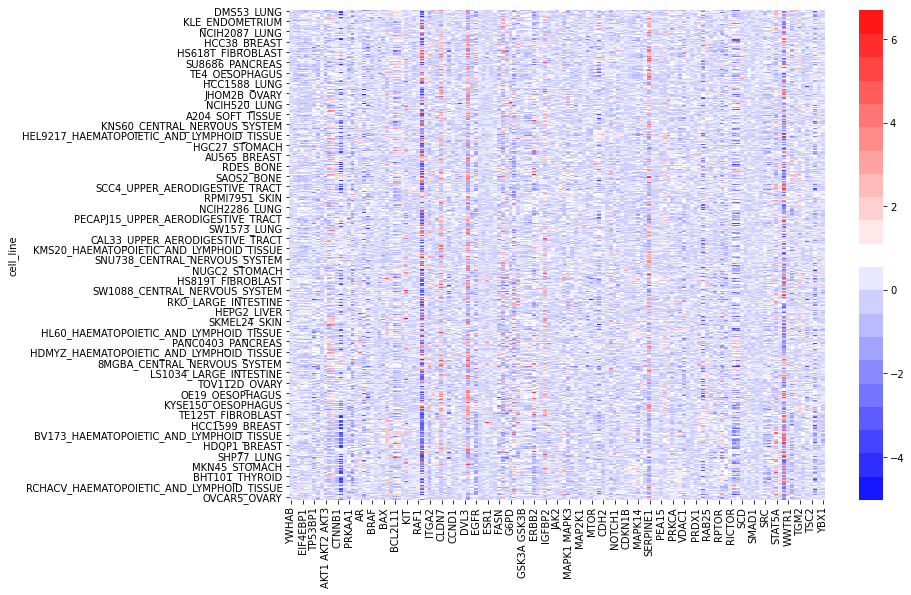

In [13]:
#ccle[['cell_line']+key_genes]

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot()
sns.heatmap(
    ccle,
    ax= ax,
#     center=1,
    cmap=sns.color_palette("bwr", 21),
#     linewidths=0.01,
#     vmax=10,
#     vmin=-11,
#     annot=True,
#     fmt="0.2f"
);
plt.savefig('heatmap_rppa.png', bbox_inches='tight')

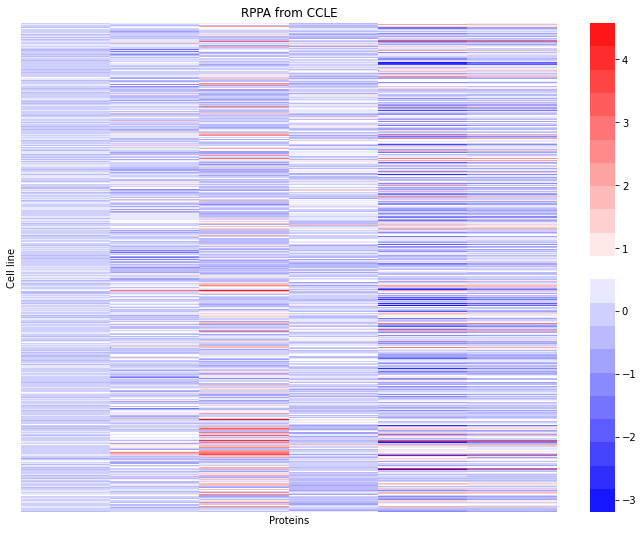

In [55]:

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot()
sns.heatmap(
    ccle[key_genes],
    ax= ax,
    cmap=sns.color_palette("bwr", 21),
    xticklabels='',
    yticklabels=''
);
plt.title("RPPA from CCLE")
plt.xlabel("Proteins");
plt.ylabel("Cell line");
plt.savefig('rppa_heatmap.png', dpi=300, bbox_inches='tight')
# plt.savefig('heatmap_filtered_by_cellline.png', bbox_inches='tight')

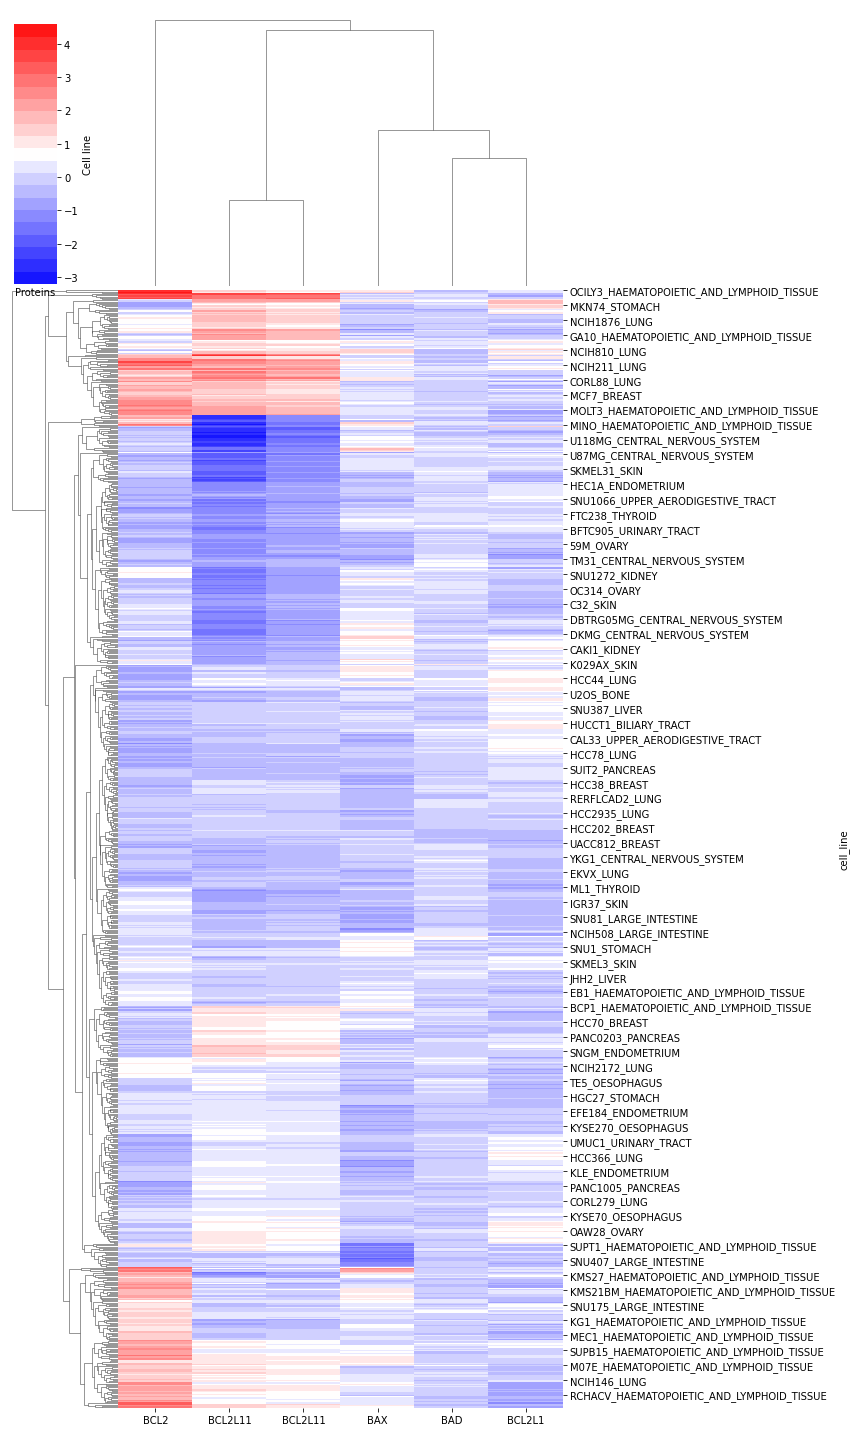

In [61]:

g = sns.clustermap(
    ccle[key_genes],
    cmap=sns.color_palette("bwr", 21),
    figsize=(12,20),
#     xticklabels='',
#     yticklabels=''
);

g.ax_heatmap.set_label("RPPA from CCLE")
plt.xlabel("Proteins");
plt.ylabel("Cell line");
plt.savefig('rppa_heatmap.png', dpi=300, bbox_inches='tight')

In [60]:
g.ax_heatmap.set_label

<AxesSubplot:ylabel='cell_line'>